**Importing Libraries**

In [1]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout,MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Importing Image Data**

In [2]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip


--2023-09-07 21:44:35--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2023-09-07 21:44:36--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce8d88c2dfa859aa21c2fae4e6f.dl.dropboxusercontent.com/cd/0/inline/CDSRtFtHu6R0bmvzgYDG6a8P9xL4hhnxTQYvE2jJaHGrfS_oZaaJvwNIC-MPdQoaaGa7lvlYjzAjj8aJzjoWmCKrt_fgmU0fTB2wvHPXQ-msuvhT9PZ_6BULaC5dZE2BxvRnC6LW5vA0f_Mo3o0UzFwP/file# [following]
--2023-09-07 21:44:36--  https://uce8d88c2dfa859aa21c2fae4e6f.dl.dropboxusercontent.com/cd/0/inline/CDSRtFtHu6R0bmvzgYDG6a8P9xL4hhnxTQYvE2jJaHGrfS_oZaaJvwNIC-MPdQoaaGa7lvlYjzAjj8aJzjoWmCKrt_

**Unzipping the compressed data**

In [3]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/dogs/dog.1930.jpg  
  inflating: training_set/training_set/dogs/dog.1931.jpg  
  inflating: training_set/training_set/dogs/dog.1932.jpg  
  inflating: training_set/training_set/dogs/dog.1933.jpg  
  inflating: training_set/training_set/dogs/dog.1934.jpg  
  inflating: training_set/training_set/dogs/dog.1935.jpg  
  inflating: training_set/training_set/dogs/dog.1936.jpg  
  inflating: training_set/training_set/dogs/dog.1937.jpg  
  inflating: training_set/training_set/dogs/dog.1938.jpg  
  inflating: training_set/training_set/dogs/dog.1939.jpg  
  inflating: training_set/training_set/dogs/dog.194.jpg  
  inflating: training_set/training_set/dogs/dog.1940.jpg  
  inflating: training_set/training_set/dogs/dog.1941.jpg  
  inflating: training_set/training_set/dogs/dog.1942.jpg  
  inflating: training_set/training_set/dogs/dog.1943.jpg  
  inflating: training_set/training_set/dogs/dog.1944.jpg  
  infl

**Printing sample images of Cats**

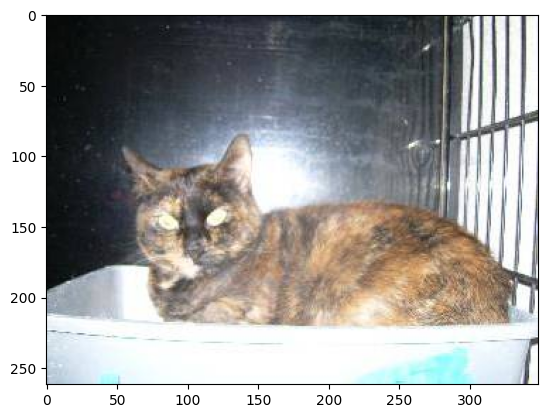

In [6]:
img = mpimg.imread('/content/training_set/training_set/cats/cat.1042.jpg')
imgplot = plt.imshow(img)
plt.show()

**Printing Sample Image of Dog**

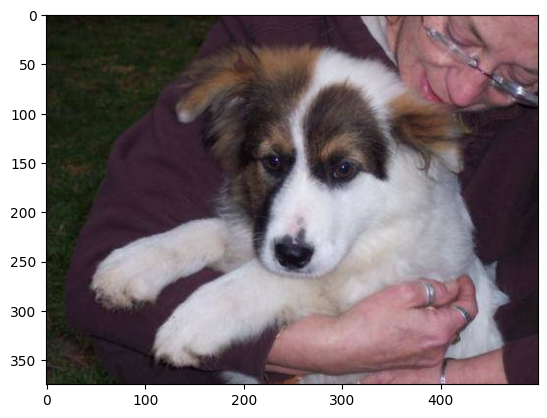

In [7]:
img = mpimg.imread('/content/training_set/training_set/dogs/dog.1147.jpg')
imgplot= plt.imshow(img)
plt.show()

**Parameter Initialization**

In [8]:
img_width, img_height = 150,150
train_data_dir = r"/content/training_set/training_set"
validation_data_dir = r"/content/test_set/test_set"
nb_train_sample = 100
nb_validation_sample = 100
epochs = 10
batch_size=20

**Checking Shape of the images**

In [9]:
import tensorflow.keras.backend as k
if k.image_data_format() == 'channel_first':
  input_shape = (3, img_width, img_height)
else:
  input_shape = (img_width, img_height,3)

**Image Generation for Model Training**

In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. /255) # reducing the RGB value from the  range 0-255 to the range 0-1

train_generator = train_datagen.flow_from_directory(
                              train_data_dir,
                              target_size= (img_height,img_height),
                              batch_size=batch_size,
                              class_mode = 'binary',
                              classes = ['cats','dogs'])

validation_generator = test_datagen.flow_from_directory(
                        validation_data_dir,
                        target_size = (img_height,img_height),
                        batch_size=batch_size,
                        class_mode = 'binary')


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


**Representation of ImageDataGenerator**

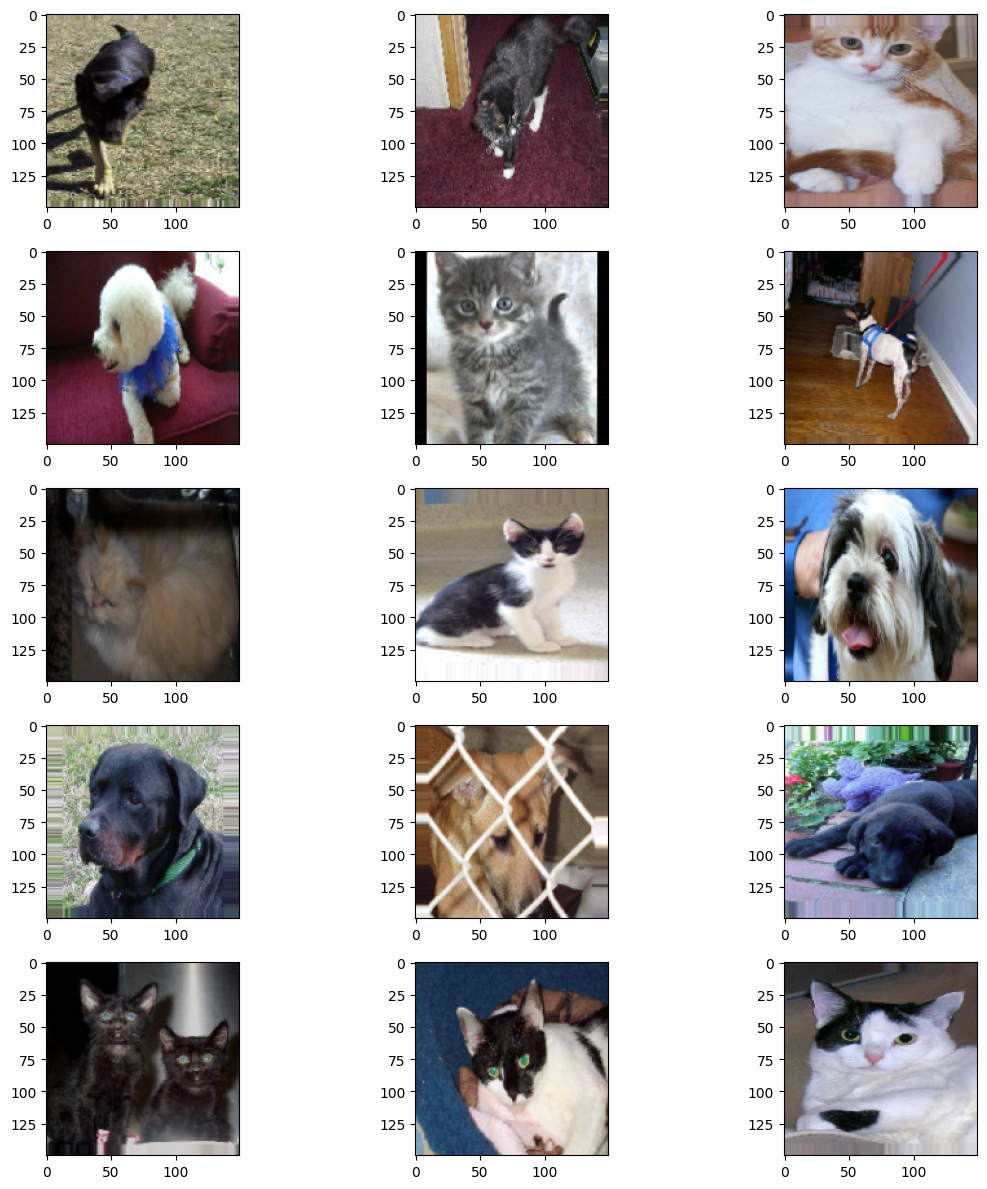

In [11]:
plt.figure(figsize=(12,12))
for i in range (0,15):
  plt.subplot(5,3,i+1)
  for X_batch, Y_batch in train_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

**CNN Model Building**


Layers being used in CNN are:
1. Convolutional Layer
2. ReLU
3. Pooling Layer
4. Dense(fully connected layer)

In [12]:
model = Sequential()
model.add(
    Conv2D(64,(3,3),                          # 64 neurons using 3x3 metrix filter
    input_shape = input_shape
    ))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))      # pooling reduces the size of the data

model.add(Flatten())                          # it converts multidimentional array to 1D array
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dense(1))                           # output layer
model.add(Activation('sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

**Model Compilation**

In [13]:
model.compile(
    optimizer='rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
    )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

**Fitting the Model**

In [14]:
training = model.fit(train_generator,
                     steps_per_epoch = nb_train_sample,
                     epochs = epochs,
                     validation_data=validation_generator,
                     validation_steps=nb_validation_sample)

Epoch 1/10
100/100 [==============================] - 124s 1s/step - loss: 1.3980 - accuracy: 0.5460 - val_loss: 0.6711 - val_accuracy: 0.5595
Epoch 2/10
100/100 [==============================] - 142s 1s/step - loss: 0.6760 - accuracy: 0.6015 - val_loss: 0.8601 - val_accuracy: 0.5010
Epoch 3/10
100/100 [==============================] - 153s 2s/step - loss: 0.6515 - accuracy: 0.6180 - val_loss: 0.6222 - val_accuracy: 0.6715
Epoch 4/10
100/100 [==============================] - 142s 1s/step - loss: 0.6360 - accuracy: 0.6332 - val_loss: 0.6706 - val_accuracy: 0.5860
Epoch 5/10
100/100 [==============================] - 144s 1s/step - loss: 0.6379 - accuracy: 0.6420 - val_loss: 0.5897 - val_accuracy: 0.6975
Epoch 6/10
100/100 [==============================] - 144s 1s/step - loss: 0.6140 - accuracy: 0.6700 - val_loss: 0.6167 - val_accuracy: 0.6570
Epoch 7/10
100/100 [==============================] - 143s 1s/step - loss: 0.6103 - accuracy: 0.6760 - val_loss: 0.6862 - val_accuracy: 0.5845

**Model Accuracy with train and test data**

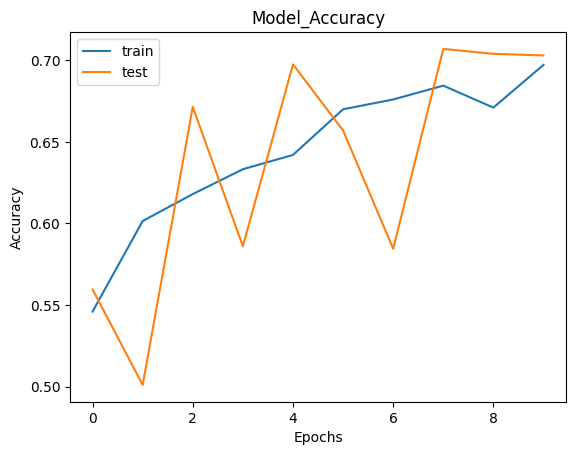

In [15]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

**Plotting Train_Loss  Vs  Test_Loss**

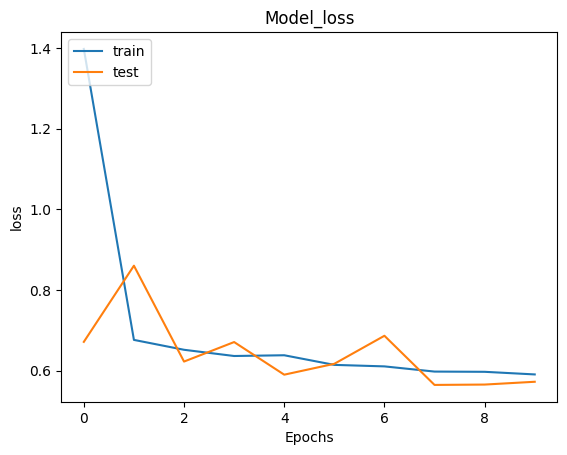

In [16]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc = 'upper left')
plt.show()